In [7]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

In [8]:
# Generate random points on the unit sphere S²
def sample_sphere(n_points):
    phi = np.random.uniform(0, 2 * np.pi, n_points)
    cos_theta = np.random.uniform(-1, 1, n_points)
    theta = np.arccos(cos_theta)
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    return np.vstack((x, y, z)).T


# Project fixed vector v onto the tangent space at point x on S²
def project_to_tangent(x, v):
    return v - np.dot(v, x) * x


# Create sphere surface mesh for Plotly
def create_sphere_surface(resolution=50):
    u = np.linspace(0, 2 * np.pi, resolution)
    v = np.linspace(0, np.pi, resolution)
    u, v = np.meshgrid(u, v)
    xs = np.cos(u) * np.sin(v)
    ys = np.sin(u) * np.sin(v)
    zs = np.cos(v)
    return xs, ys, zs


# Main
n_particles = 200
particles = sample_sphere(n_particles)
v_fixed = np.array([0, 0, 1])  # Global direction (e.g. North Pole)
projected_vectors = np.array([project_to_tangent(p, v_fixed) for p in particles])

# Sphere surface
xs, ys, zs = create_sphere_surface()

# Scatter points
# scatter = go.Scatter3d(
#     x=particles[:, 0], y=particles[:, 1], z=particles[:, 2],
#     mode='markers',
#     marker=dict(size=4, color='red'),
#     name='Particles'
# )

# Scatter vector arrows projected on tangent space of sphere
tangent_vecs = go.Cone(
    x=particles[:, 0],
    y=particles[:, 1],
    z=particles[:, 2],
    u=projected_vectors[:, 0],
    v=projected_vectors[:, 1],
    w=projected_vectors[:, 2],
    sizemode="raw",
    sizeref=0.2,
    anchor="tail",
    # colorscale='Reds',
    colorscale=[[0, "red"], [1, "red"]],
    showscale=False,
    name="Projected Vectors",
)

# Fixed direction vector (green)
global_vec = go.Cone(
    x=[0],
    y=[0],
    z=[0],
    u=[v_fixed[0]],
    v=[v_fixed[1]],
    w=[v_fixed[2]],
    sizemode="raw",
    sizeref=0.4,
    anchor="tail",
    colorscale="Greens",
    showscale=False,
    name="Global Direction",
)

# Sphere surface mesh
surface = go.Surface(x=xs, y=ys, z=zs, opacity=0.3, colorscale="Blues", showscale=False)

# Layout and figure
layout = go.Layout(
    width=600,
    height=600,
    # scene=dict(
    #     xaxis=dict(range=[-1.2, 1.2]),
    #     yaxis=dict(range=[-1.2, 1.2]),
    #     zaxis=dict(range=[-1.2, 1.2]),
    #     aspectmode="data",
    # ),
    scene=dict(
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        zaxis=dict(visible=False),
        aspectmode="data",
    ),
    title="Projected Motion of Particles on Unit Sphere",
    showlegend=True,
)

fig = go.Figure(
    data=[
        surface,
        # scatter,
        tangent_vecs,
        global_vec,
    ],
    layout=layout,
)
fig.show()

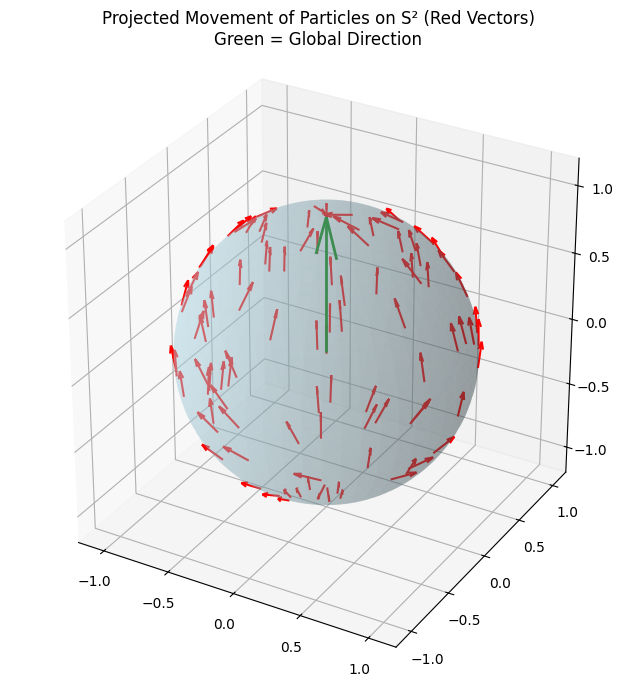

In [9]:
# Generate random points on the unit sphere S^2
def sample_sphere(n_points):
    phi = np.random.uniform(0, 2 * np.pi, n_points)
    cos_theta = np.random.uniform(-1, 1, n_points)
    theta = np.arccos(cos_theta)
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    return np.vstack((x, y, z)).T


# Project vector v onto the tangent space at point x on S^2
def project_to_tangent(x, v):
    return v - np.dot(v, x) * x


# Plot the sphere and movement vectors
def plot_sphere_with_vectors(points, vectors, v_fixed):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")

    # Draw the unit sphere
    u, v = np.mgrid[0 : 2 * np.pi : 100j, 0 : np.pi : 100j]
    xs = np.cos(u) * np.sin(v)
    ys = np.sin(u) * np.sin(v)
    zs = np.cos(v)
    ax.plot_surface(xs, ys, zs, color="lightblue", alpha=0.3)

    # Plot points and vectors
    for p, vec in zip(points, vectors):
        ax.quiver(
            p[0],
            p[1],
            p[2],
            vec[0],
            vec[1],
            vec[2],
            color="red",
            length=0.2,
            normalize=True,
        )

    # Plot the GLOBAL direction vector v_fixed
    ax.quiver(
        0,
        0,
        0,
        v_fixed[0],
        v_fixed[1],
        v_fixed[2],
        color="green",
        length=1.0,
        linewidth=2,
    )
    # ax.quiver(0, 0, 0, -v_fixed[0], -v_fixed[1], -v_fixed[2], color='green', length=1.0, linewidth=2)

    ax.set_box_aspect([1, 1, 1])
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])
    ax.set_zlim([-1.2, 1.2])
    ax.set_title(
        "Projected Movement of Particles on S² (Red Vectors)\nGreen = Global Direction"
    )
    plt.show()


# Main simulation
n_particles = 100
particles = sample_sphere(n_particles)
v_fixed = np.array([0, 0, 1])  # Global direction (e.g., North Pole)

projected_vectors = np.array([project_to_tangent(p, v_fixed) for p in particles])
plot_sphere_with_vectors(particles, projected_vectors, v_fixed)